In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('us-states.csv')


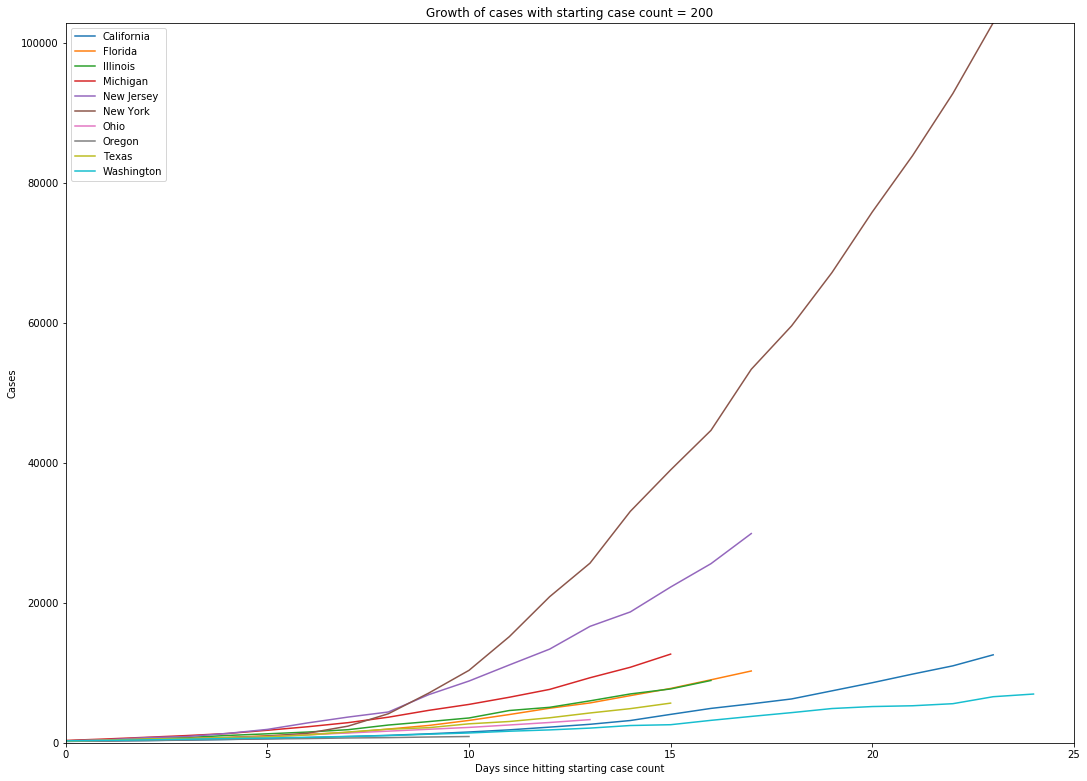

In [3]:
starting_cases = 200
fig = plt.figure(figsize=(14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Growth of cases with starting case count = ' + str(starting_cases))
ax.set_xlabel('Days since hitting starting case count')
ax.set_ylabel('Cases')

interesting_states = pd.Series([
    'Washington', 
    'New York', 
    'Florida',
    'California',
    'New Jersey',
    'Ohio',
    'Texas',
    'Oregon',
    'Michigan',
    'Illinois'
    ])

def doplot(fulldata, state):
    data = fulldata[fulldata.state == state][['date', 'cases']]
    data = data[data.cases >= starting_cases]
    if len(data['cases']):
        data_asarray = data.cases.values
        ax.set_xlim(0, max(data_asarray.size, ax.get_xlim()[1]))
        ax.set_ylim(0, max(data['cases'].max(), ax.get_ylim()[1]))
        ax.plot(data_asarray, label=state)

for s in np.sort(data[data.state.isin(interesting_states)].state.unique()):
    doplot(data, s)

ax.legend()


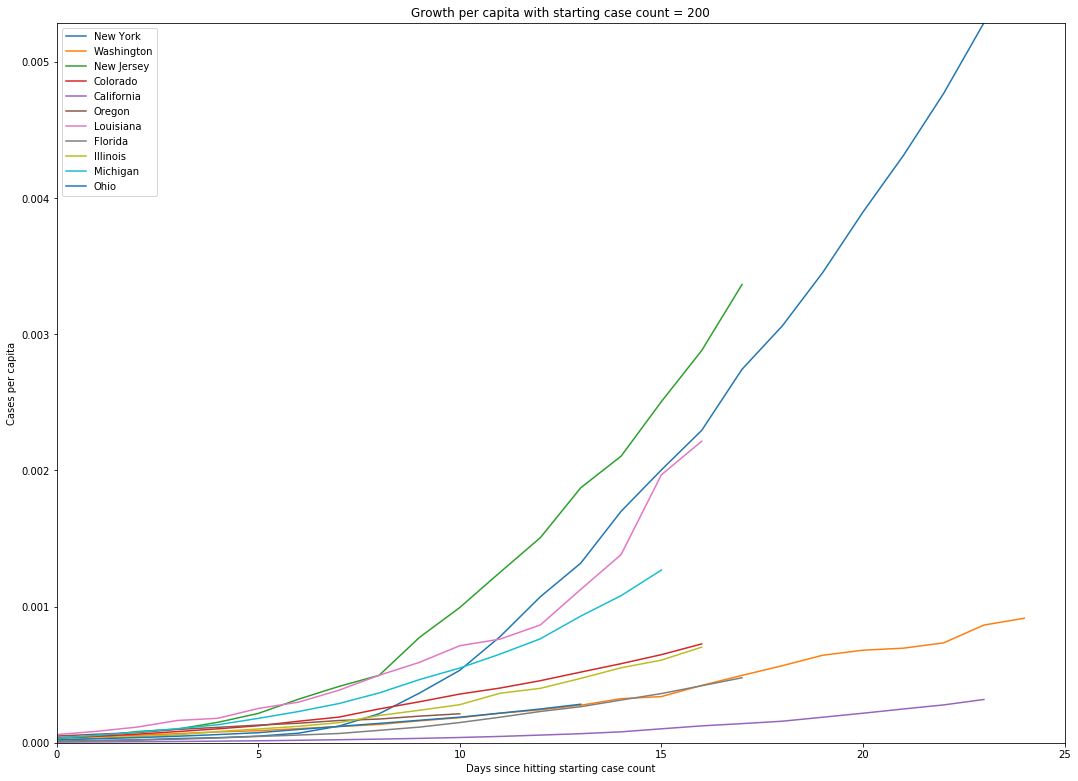

In [4]:
starting_cases = 200
fig = plt.figure(figsize=(14,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Growth per capita with starting case count = ' + str(starting_cases))
ax.set_xlabel('Days since hitting starting case count')
ax.set_ylabel('Cases per capita')
ax.set_ylim(0, 0.000001)
def doplotpercapita(fulldata, state, population):
    data = fulldata[fulldata.state == state][['date', 'cases']]
    data = data[data.cases >= starting_cases]
    data.cases = data.cases / population
    if len(data['cases']):
        data_asarray = data.cases.values
        ax.set_xlim(0, max(data_asarray.size, ax.get_xlim()[1]))
        ax.set_ylim(0, max(data['cases'].max(), ax.get_ylim()[1]))
        ax.plot(data_asarray, label=state)

doplotpercapita(data, 'New York', 19453561)
doplotpercapita(data, 'Washington', 7614893)
doplotpercapita(data, 'New Jersey', 8882190)
doplotpercapita(data, 'Colorado', 5758736)
doplotpercapita(data, 'California', 39512223)
doplotpercapita(data, 'Oregon', 4217737)
doplotpercapita(data, 'Louisiana', 4648794)
doplotpercapita(data, 'Florida', 21477737)
doplotpercapita(data, 'Illinois', 12671821)
doplotpercapita(data, 'Michigan', 9986857)
doplotpercapita(data, 'Ohio',11689100)

ax.legend()

In [71]:
def doplotbydate(fulldf, date, state):
    data = fulldf[fulldf.state == state][['date', 'cases']]
    data = data[data.date >= date]
    doplot(data, state)

def doplotbymincases(fulldf, min, state):
    data = fulldf[fulldf.state == state][['date', 'cases']]
    data = data[data.cases >= min]
    data.sort_values('cases', 0, True, True)
    doplot(data, state)

def doplot(fulldf, state):
    data_asarray = fulldf.cases.values
    plt.yscale('log')
    plt.xlabel('date')
    plt.ylabel('cases')
    plt.plot(data_asarray, label=state)
    plt.legend()



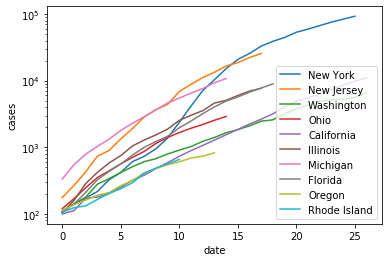

In [72]:
date = '2020-03-15'
minimum_cases = 100
doplotbymincases(data, minimum_cases, 'New York')
doplotbymincases(data, minimum_cases, 'New Jersey')
doplotbymincases(data, minimum_cases, 'Washington')
doplotbymincases(data, minimum_cases, 'Ohio')
doplotbymincases(data, minimum_cases, 'California')
doplotbymincases(data, minimum_cases, 'Illinois')
doplotbymincases(data, minimum_cases, 'Michigan')
doplotbymincases(data, minimum_cases, 'Florida')
doplotbymincases(data, minimum_cases, 'Oregon')
doplotbymincases(data, minimum_cases, 'Rhode Island')

